# Tools for modern macroeconometrics

## Seminar 2c

## Structural change and break points detection 

In [38]:
if (!require(forecast)) install.packages("forecast")
if (!require(forecast)) install.packages("uroot")
library(stats)
library(repr)
library(tseries)
library(readr)
library(forecast)
#library(uroot)
library(urca)
library(strucchange)

In [1]:
options(repr.plot.width = 10, repr.plot.height = 4)

In [8]:
yall   <- read.csv("ts_exALL.csv")
ned  <- read.csv("Ned.csv")  #GDP of Netherlands (Chage the computational methodolofy)
ur     <- read.csv("ur.csv")     #simulated unit root
proc <- read.csv("data_semina3.csv")

y1    <- yall[,1]
y2    <- yall[,2]
y3    <- yall[,3]

m1   <- yall[,4]
m2   <- yall[,5]

yr     <- rnorm(500)

tsqf  <- proc$Y3

ur1   <- ur[,1] #stationary AR(1) with jump in the middle [if you estimate first and second half it will show more accurate]
ur2   <- ur[,2] #unit root with unit jump

ned_v    <- ned[,1]
ned_diff <- ned[,2]

In [ ]:
y_start  <- y[1:100]
y_01     <- y[1:(length(y) / 2)-1]  #200 obs. 1:99
y_02     <- y[(length(y) / 2):length(y)] # 100 : 200
# try also ned

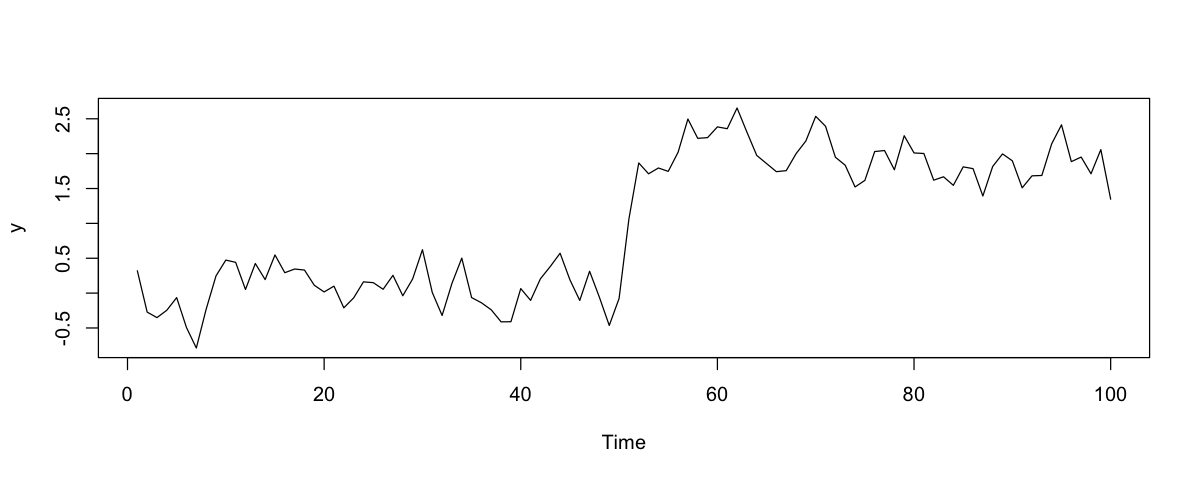

Series: y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.9392  0.9526
s.e.  0.0307  0.4655

sigma^2 = 0.107:  log likelihood = -30.18
AIC=66.37   AICc=66.62   BIC=74.18

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE     MASE
Training set 0.01001044 0.3237474 0.2639662 -45.14567 174.5092 0.990899
                   ACF1
Training set 0.04230588

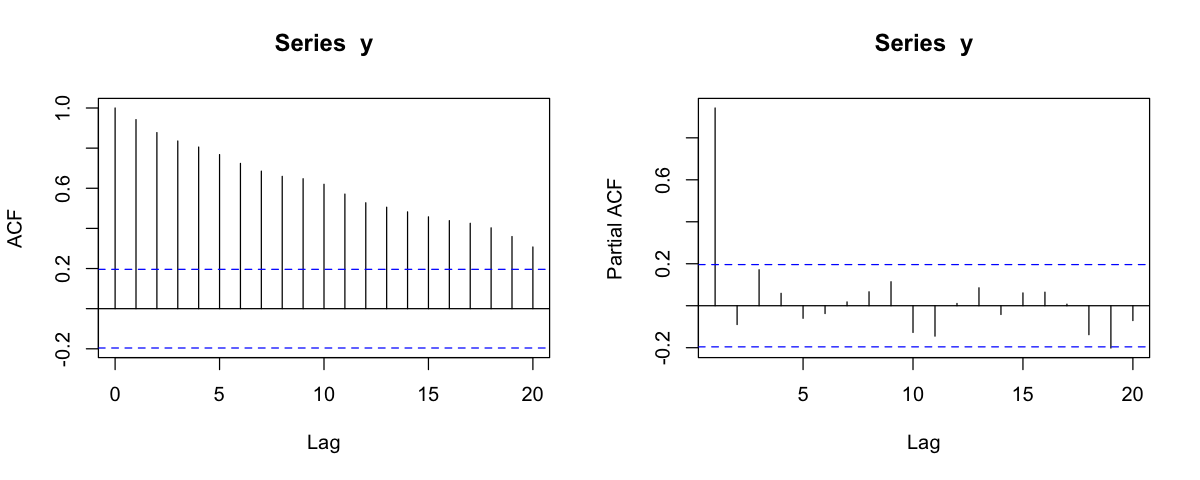

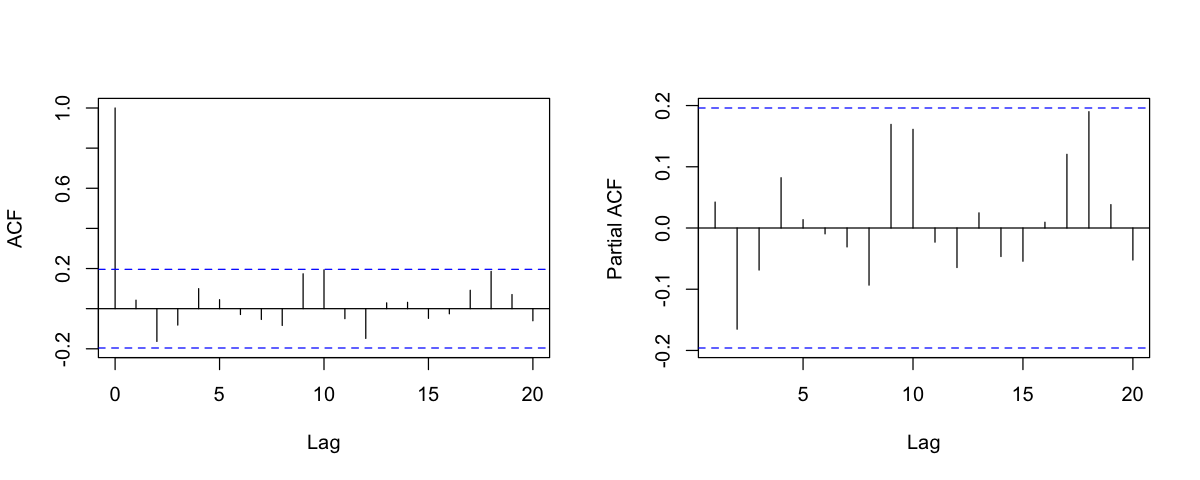

In [25]:
y<-ur1
#y<- y[52:100]
plot.ts(y)
par(mfrow = c(1, 2))
acf(y)
pacf(y)

y_model <- Arima(y, order = c(1, 0, 0))
# Try also c(1,0,1) and compare ACF of res., AIC ans BIC
summary(y_model)

# y_model2 <- auto.arima(y)
# summary(y_model2)

par(mfrow = c(1, 2))
acf(y_model$residuals, main = NA)
pacf(y_model$residuals, main = NA)

## Chow test
the null hypothesis of “no structural change”. Uses F test statistics.
Chow (1960) proposed a test on structural change for the case where the (potential) change point is known.
It fits two separate regressions for the two subsamples defined by defined changed point.

In [63]:
n<-length(y)
trend<-c(1:n)
sctest(y ~ trend, type="Chow", point=30)


	Chow test

data:  y ~ trend
F = 1.6735, p-value = 0.193



	Chow test

data:  ts(vec[2:100]) ~ vec[1:99]
F = 3.8259, p-value = 0.02523


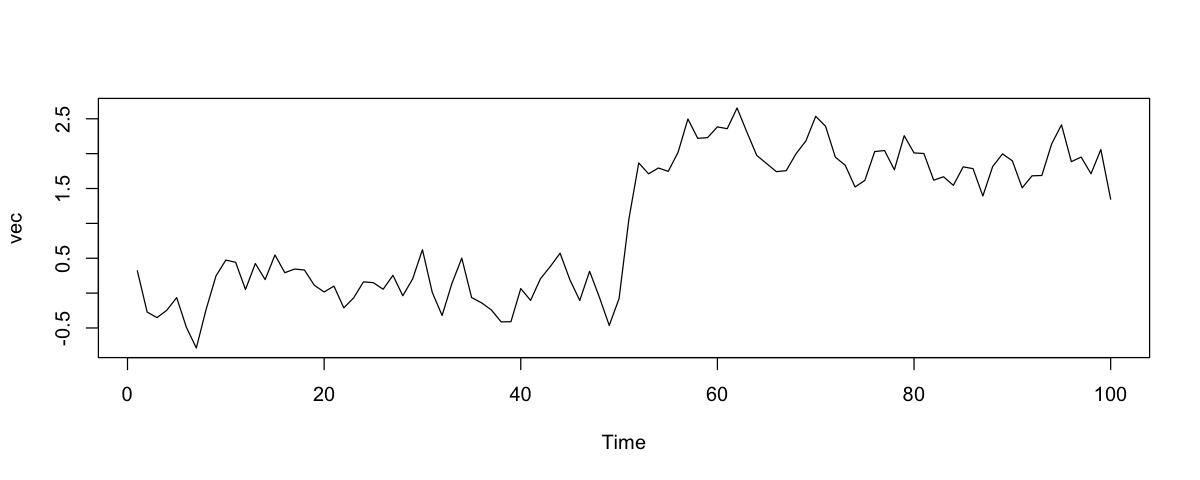

In [65]:
vec <- y
plot.ts(vec)
sctest(ts(vec[2:100]) ~ vec[1:99], type="Chow", point=30)

## Zivot-Andrews Unit Root Test
Zivot-Adrews test is able to analyze the presence of unit root and structural break in the data set. It also detect (unknown) potential break point position.

In the Zivot-Andrews tests, the null hypothesis is that the series has a unit root with structural break(s) against the alternative hypothesis that they are stationary with break(s)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6187 -0.1781 -0.0192  0.1870  0.5161 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.083454   0.062000   1.346    0.181    
y.l1         0.475148   0.072447   6.559 2.83e-09 ***
trend       -0.002436   0.001880  -1.296    0.198    
du           1.124271   0.168420   6.675 1.65e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.267 on 95 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9282 
F-statistic: 423.2 on 3 and 95 DF,  p-value: < 2.2e-16


Teststatistic: -7.2446 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 50 


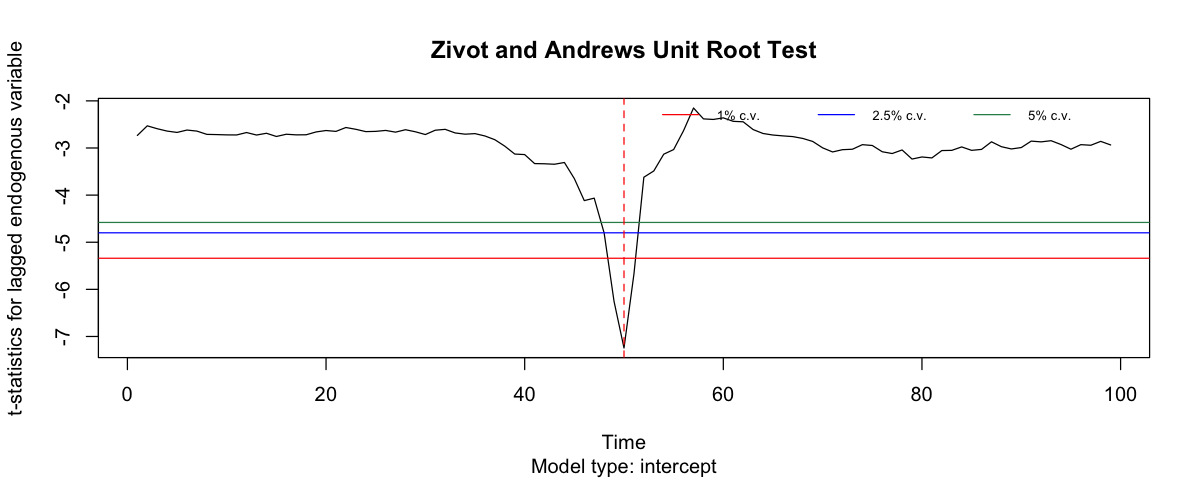

In [67]:
#za.gnp <- ur.za(y, model="both", lag=2)
za.gnp <-ur.za(y, model = c("intercept", "trend", "both"), lag=NULL)
summary(za.gnp)
plot(za.gnp)

## Break point detection

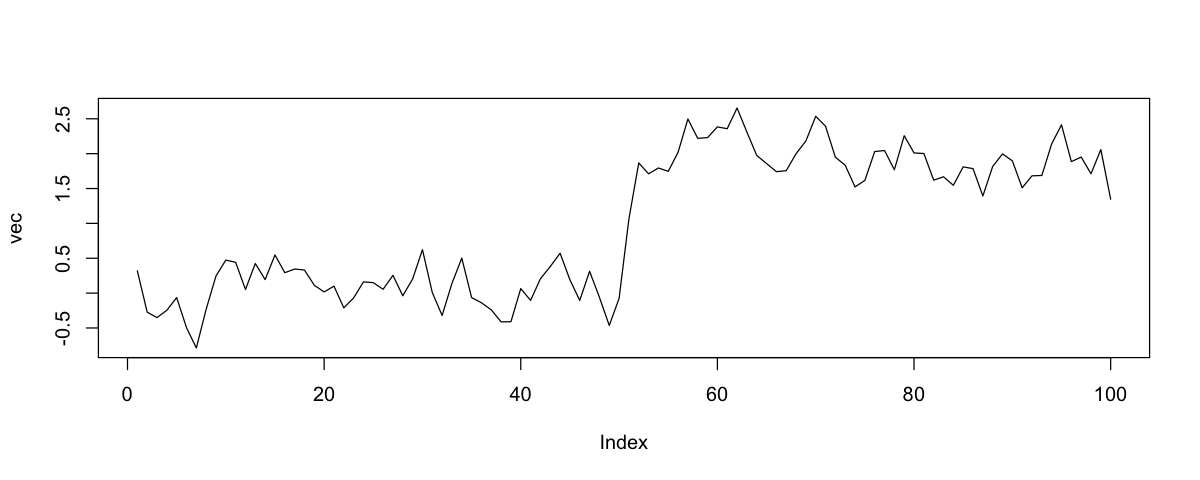

In [57]:
vec <- y
l <- length(vec)
plot(vec,type = "l")
tt <- 1:(l-1)
tt1 <- 1:l
#brk <- breakpoints(ts(vec[2:100]) ~ vec[1:99] + tt, h = 20)
brk <- breakpoints(ts(vec[2:100]) ~ vec[1:99], h = 20)

In [54]:
summary(brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = ts(vec[2:100]) ~ vec[1:99] + tt, 
    h = 40)

Breakpoints at observation number:
          
m = 1   49

Corresponding to breakdates:
          
m = 1   49

Fit:
                 
m   0      1     
RSS  9.952  6.566
BIC 71.895 49.105

In [55]:
brk <- breakpoints(ts(vec[2:100]) ~ vec[1:99] + tt, h = 20)

In [56]:
summary(brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = ts(vec[2:100]) ~ vec[1:99] + tt, 
    h = 20)

Breakpoints at observation number:
                
m = 1      49   
m = 2   29 49   
m = 3   29 49 70

Corresponding to breakdates:
                
m = 1      49   
m = 2   29 49   
m = 3   29 49 70

Fit:
                               
m   0      1      2      3     
RSS  9.952  6.566  6.192  5.893
BIC 71.895 49.105 61.679 75.160